<h1 align="center"> HR Analysis, Prediction and Visualization </b> </h1><br>
<img src=https://thumbs.dreamstime.com/b/cartoon-corporate-girl-presented-report-ready-animated-scene-easy-use-your-video-62761803.jpg>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
pd.set_option("display.max_columns",None)

In [2]:
df=pd.read_csv("aug_train.csv")
df.head()

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
0,8949,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,NaN,NaN,1,36,1.0
1,29725,city_40,0.776,Male,No relevent experience,no_enrollment,Graduate,STEM,15,50-99,Pvt Ltd,>4,47,0.0
2,11561,city_21,0.624,NaN,No relevent experience,Full time course,Graduate,STEM,5,NaN,NaN,never,83,0.0
3,33241,city_115,0.789,NaN,No relevent experience,NaN,Graduate,Business Degree,<1,NaN,Pvt Ltd,never,52,1.0
4,666,city_162,0.767,Male,Has relevent experience,no_enrollment,Masters,STEM,>20,50-99,Funded Startup,4,8,0.0


In [3]:
df.shape

(19158, 14)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19158 entries, 0 to 19157
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   enrollee_id             19158 non-null  int64  
 1   city                    19158 non-null  object 
 2   city_development_index  19158 non-null  float64
 3   gender                  14650 non-null  object 
 4   relevent_experience     19158 non-null  object 
 5   enrolled_university     18772 non-null  object 
 6   education_level         18698 non-null  object 
 7   major_discipline        16345 non-null  object 
 8   experience              19093 non-null  object 
 9   company_size            13220 non-null  object 
 10  company_type            13018 non-null  object 
 11  last_new_job            18735 non-null  object 
 12  training_hours          19158 non-null  int64  
 13  target                  19158 non-null  float64
dtypes: float64(2), int64(2), object(10)
me

##### There are some null values

In [5]:
df.describe()

,enrollee_id,city_development_index,training_hours,target
count,19158.000000,19158.000000,19158.000000,19158.000000
mean,16875.358179,0.828848,65.366896,0.249348
std,9616.292592,0.123362,60.058462,0.432647
min,1.000000,0.448000,1.000000,0.000000
25%,8554.250000,0.740000,23.000000,0.000000
50%,16982.500000,0.903000,47.000000,0.000000
75%,25169.750000,0.920000,88.000000,0.000000
max,33380.000000,0.949000,336.000000,1.000000


In [6]:
df.loc[0:,df.dtypes=="O"].describe()

,city,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job
count,19158,14650,19158,18772,18698,16345,19093,13220,13018,18735
unique,123,3,2,3,5,6,22,8,6,6
top,city_103,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,50-99,Pvt Ltd,1
freq,4355,13221,13792,13817,11598,14492,3286,3083,9817,8040


In [7]:
import pandas_profiling                   ### full describe report
df.profile_report()

### 1.Exploratory data analysis

#### 1.1 null values

In [8]:
null_values=[x for x in df.columns if df[x].isnull().sum()>=1]
null_values

['gender',
 'enrolled_university',
 'education_level',
 'major_discipline',
 'experience',
 'company_size',
 'company_type',
 'last_new_job']

In [9]:
for y in null_values:
    print(y,":","{}%missing values".format(np.round(df[y].isnull().mean(),decimals=4)))  #total % of missing values

gender : 0.2353%missing values
enrolled_university : 0.0201%missing values
education_level : 0.024%missing values
major_discipline : 0.1468%missing values
experience : 0.0034%missing values
company_size : 0.3099%missing values
company_type : 0.3205%missing values
last_new_job : 0.0221%missing values


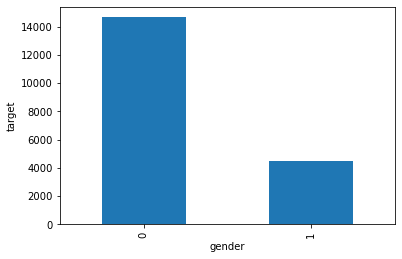

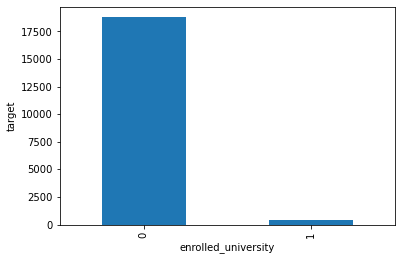

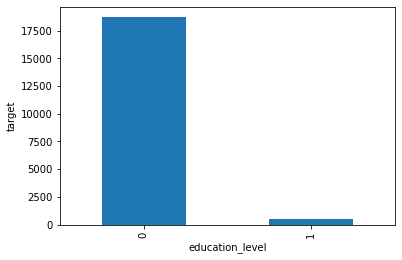

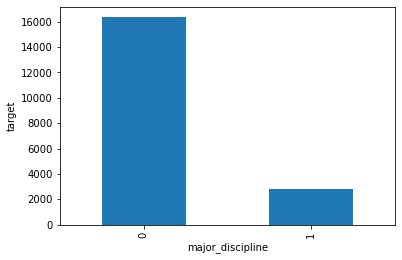

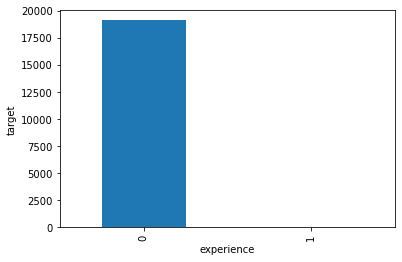

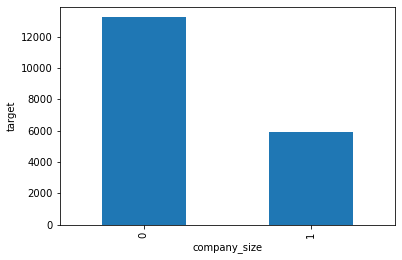

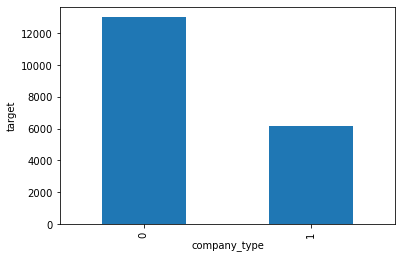

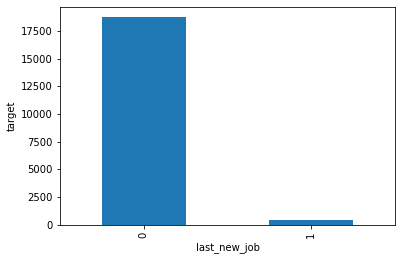

In [10]:
for i in null_values:
    df1=df.copy()
    df1[i]=np.where(df[i].isnull()>=1,1,0)
    df1[i].plot(kind="bar")
    df1.groupby(i)["target"].count().plot(kind="bar")
    plt.xlabel(i)
    plt.ylabel("target")
    plt.show()
    

#####  count of  missing values [there are only less mising values in our dataset]

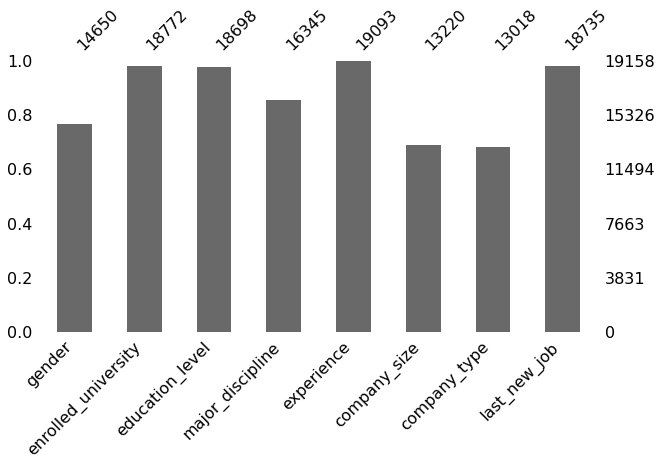

In [11]:
import missingno as msno

p=msno.bar(df[null_values],figsize=(10,5))                                     #null value plot

#### 1.2.delaying withe numerical variables

##### 1.1.1 descreate numercial values

In [12]:
dis_num=[x for x in df.columns if df[x].nunique()<=25 and df[x].dtypes!="O"]  #we have only one discreate numerical values
dis_num

['target']

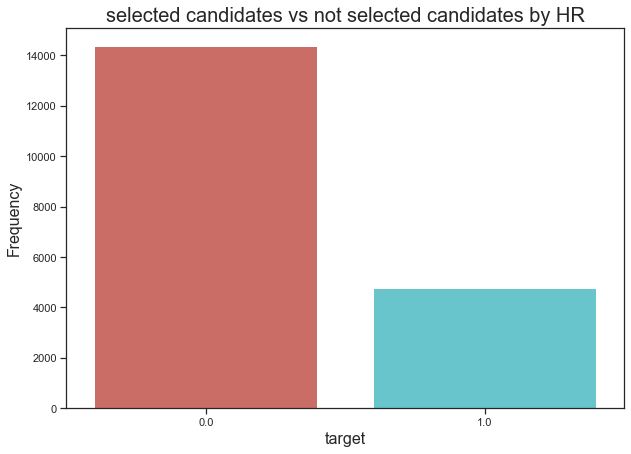

In [13]:
sns.set(style="ticks")
for i in dis_num:
  plt.figure(figsize = (10, 7))
  sns.countplot(x =i, data = df, palette = 'hls')
  plt.title('selected candidates vs not selected candidates by HR', fontsize = 20)
  plt.xlabel(i, fontsize = 16)
  plt.ylabel('Frequency', fontsize = 16)
  plt.show()

#### Our target column is not in a balanced mode our data is imbalanced

##### 1.1.2 continuous numercial values

In [14]:
con_numerical=[x for x in df.columns if df[x].dtypes!="O" and df[x].nunique()>25 and x not in ["enrollee_id"]]
con_numerical

['city_development_index', 'training_hours']

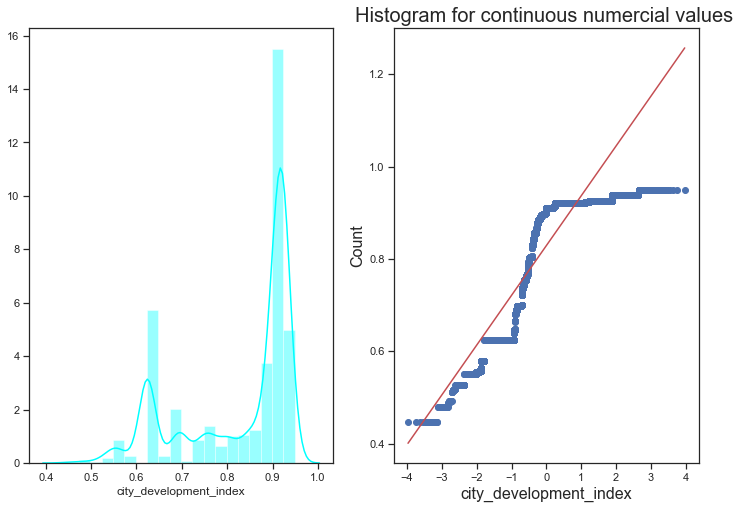

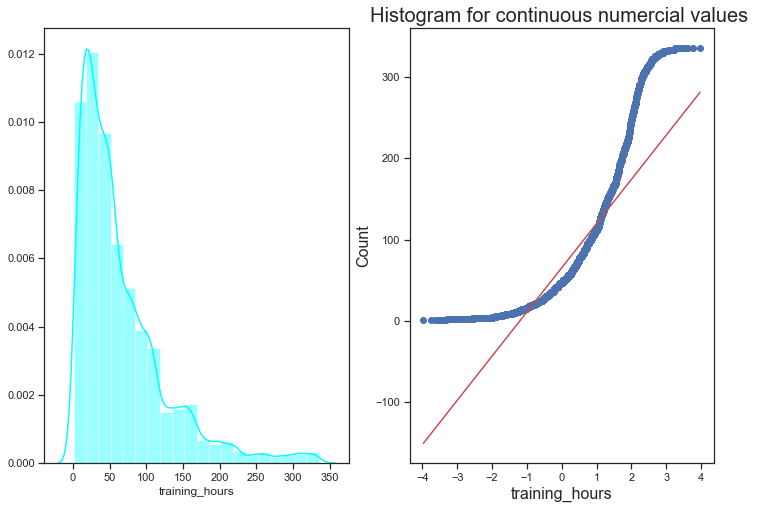

In [15]:
import scipy.stats as stat
import pylab
for i in con_numerical:
   plt.figure(figsize = (12, 8))
   plt.style.use('tableau-colorblind10')
   plt.subplot(1,2,1)
   sns.distplot(df[i],kde=True, bins =20, color = 'cyan')
   plt.subplot(1,2,2)
   stat.probplot(df[i],dist='norm',plot=pylab)
   plt.xlabel(i, fontsize = 16)
   plt.ylabel('Count',fontsize = 16)
   plt.title(label = 'Histogram for continuous numercial values ', fontsize = 20)
   plt.show()

##### our data is not normaly distributed

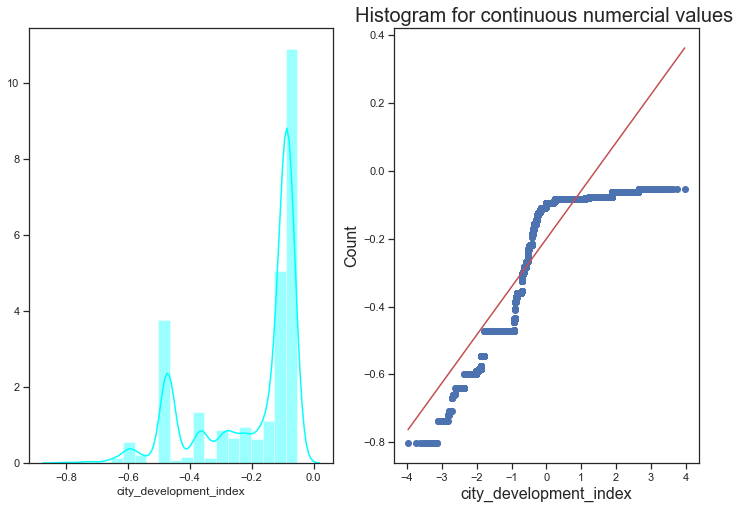

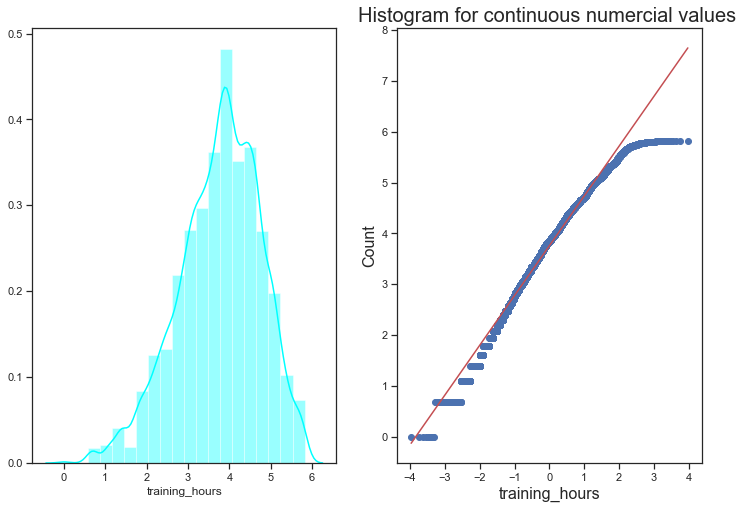

In [16]:
for i in con_numerical:
    df1=df.copy()
    df1[i]=np.log(df[i])
    plt.figure(figsize = (12, 8))
    plt.style.use('tableau-colorblind10')
    plt.subplot(1,2,1)
    sns.distplot(df1[i],kde=True, bins =20, color = 'cyan')
    plt.subplot(1,2,2)
    stat.probplot(df1[i],dist='norm',plot=pylab)
    plt.xlabel(i, fontsize = 16)
    plt.ylabel('Count',fontsize = 16)
    plt.title(label = 'Histogram for continuous numercial values ', fontsize = 20)
    plt.show()

##### we have some what normalised our dataset

##### handling  outlayers 

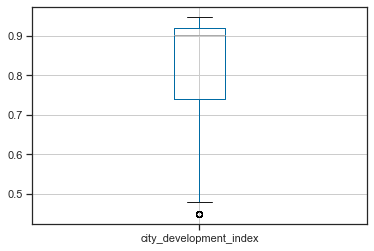

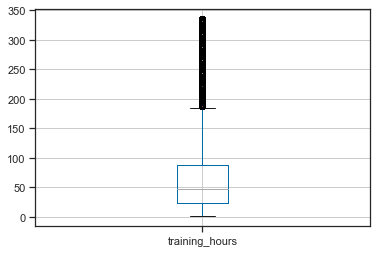

In [17]:
for i in con_numerical:
    if "target" not in i:   # no need handle outlayers for targrt column
         df.boxplot(column=i)
         plt.show()       

##### there is some outlayers

#### 1.3 delaying with catagorical values

In [18]:
cat_variables=[x for x in df.columns if df[x].dtypes=="O"]
cat_variables

['city',
 'gender',
 'relevent_experience',
 'enrolled_university',
 'education_level',
 'major_discipline',
 'experience',
 'company_size',
 'company_type',
 'last_new_job']

In [19]:
for i in cat_variables:             
    print("The feature is {} and the unique variables is {}".format(i,df[i].nunique()))

The feature is city and the unique variables is 123
The feature is gender and the unique variables is 3
The feature is relevent_experience and the unique variables is 2
The feature is enrolled_university and the unique variables is 3
The feature is education_level and the unique variables is 5
The feature is major_discipline and the unique variables is 6
The feature is experience and the unique variables is 22
The feature is company_size and the unique variables is 8
The feature is company_type and the unique variables is 6
The feature is last_new_job and the unique variables is 6


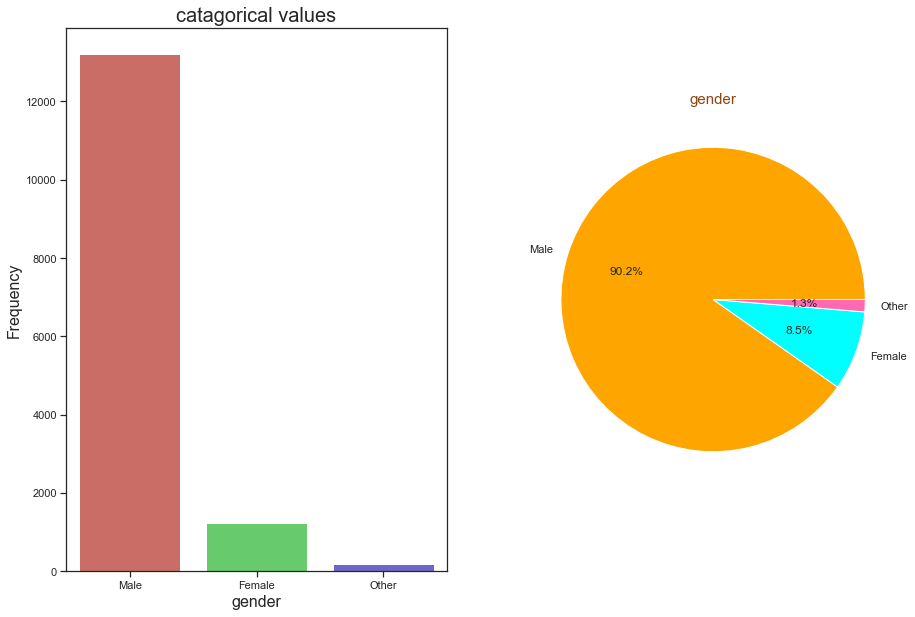

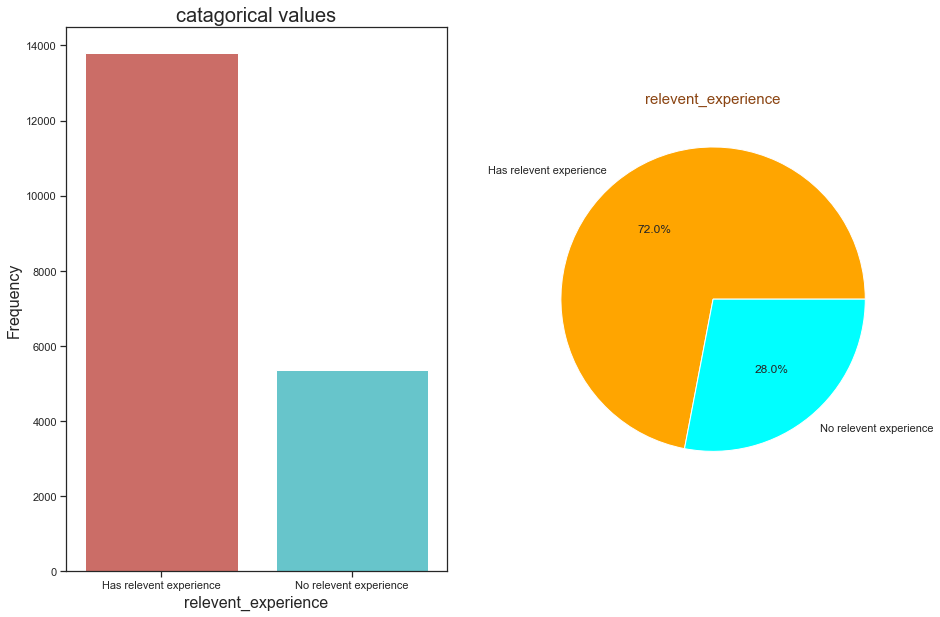

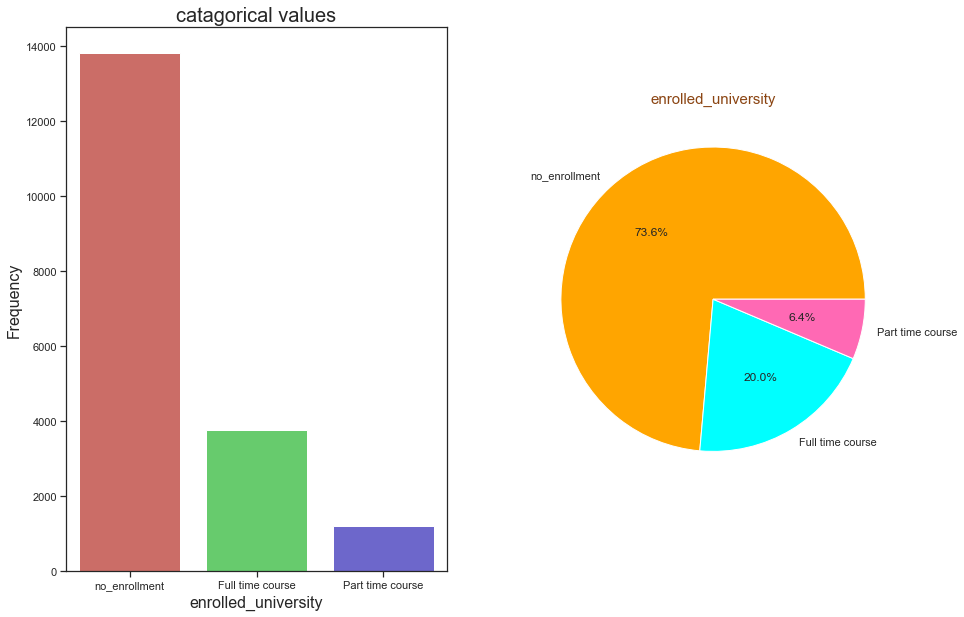

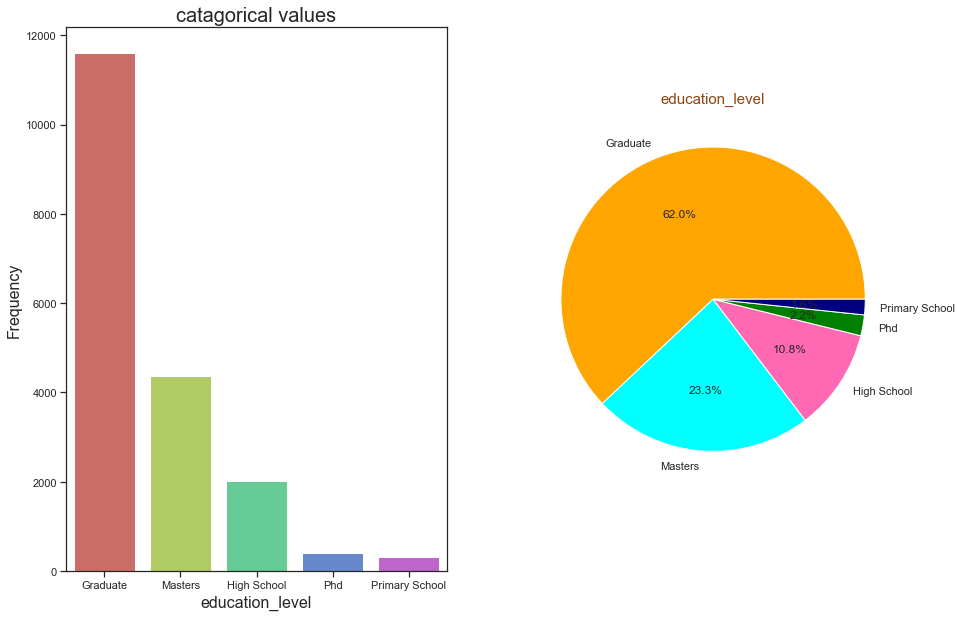

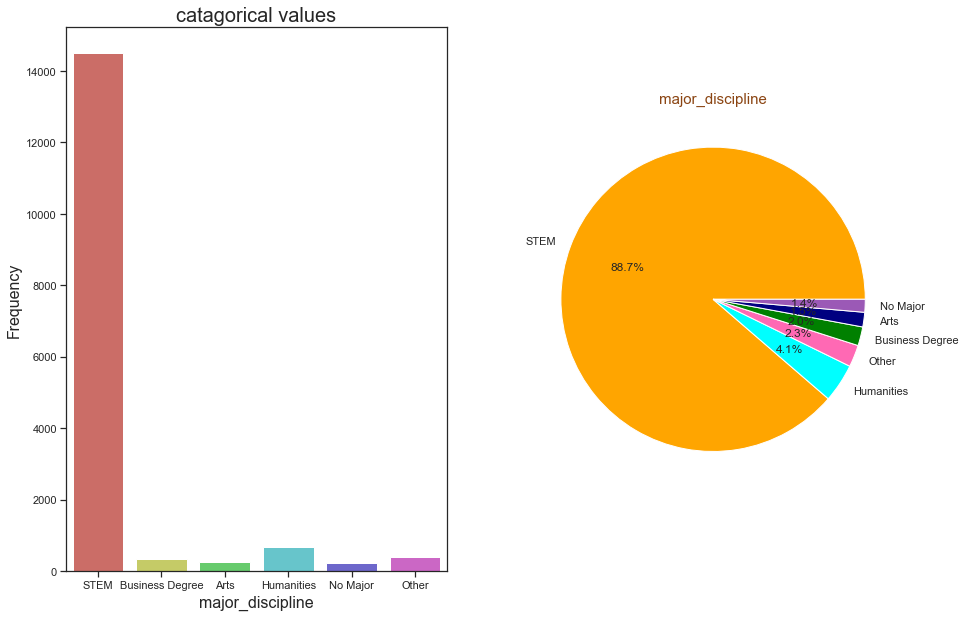

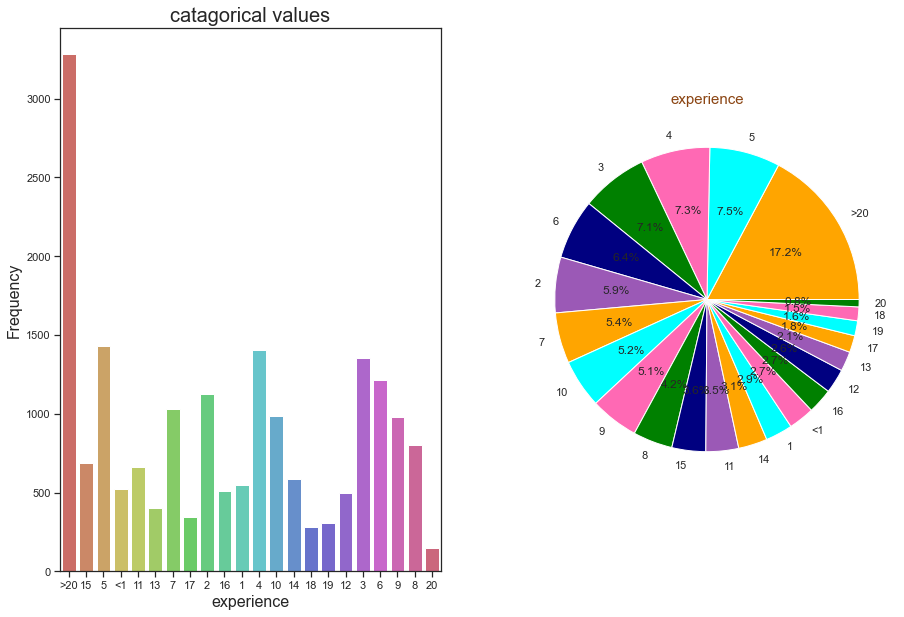

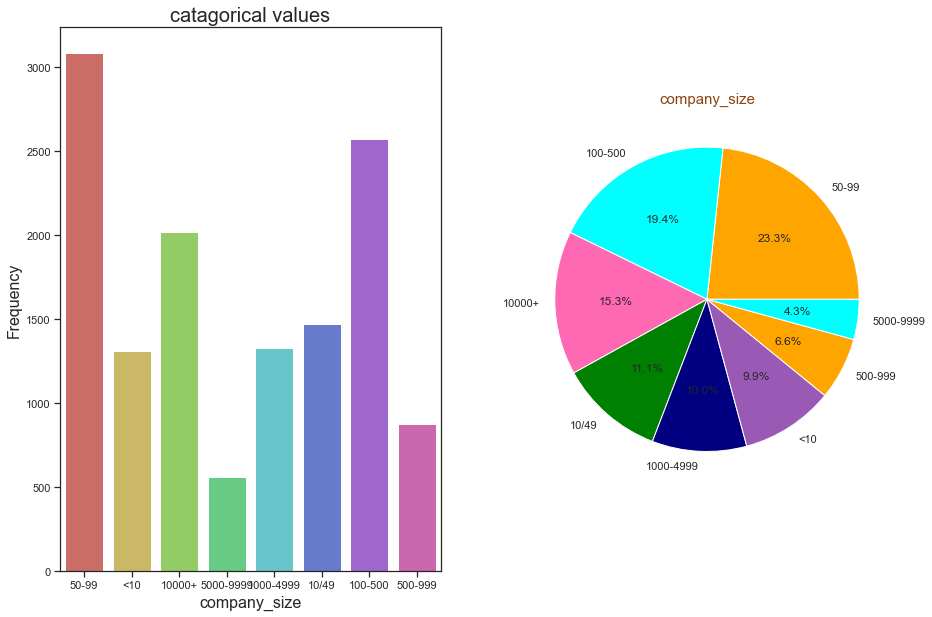

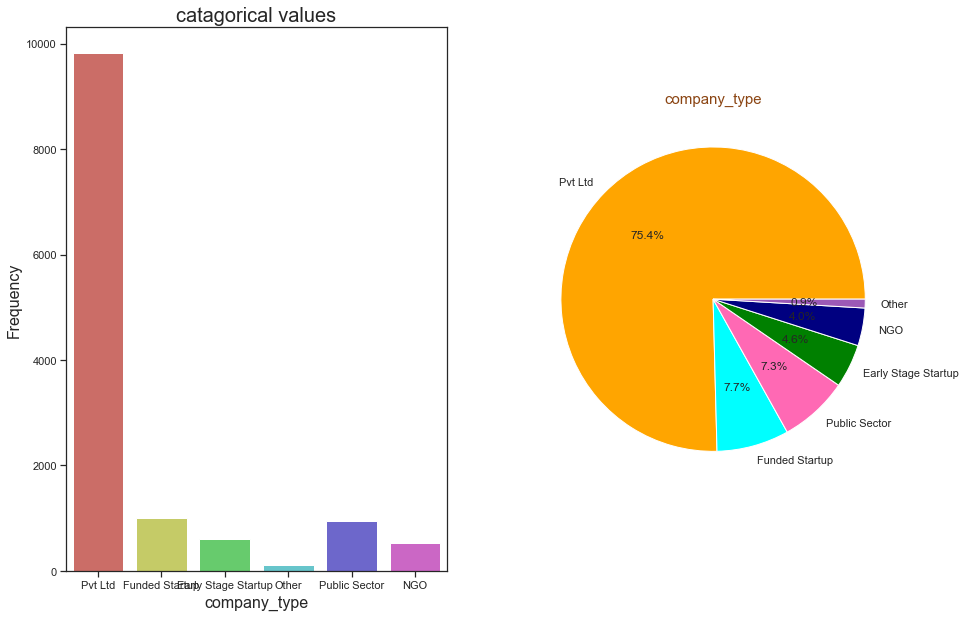

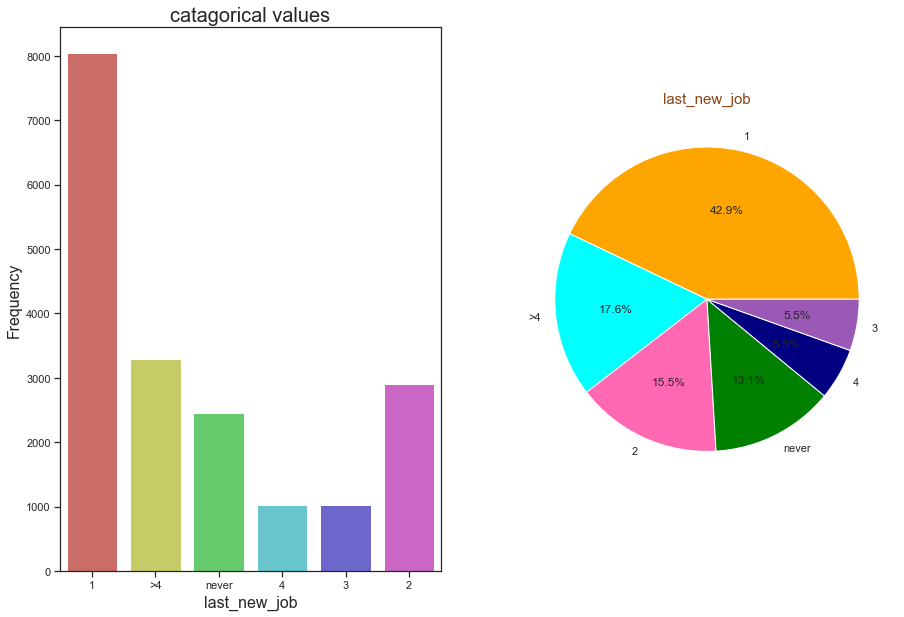

In [20]:
for i in cat_variables:                       ## as city has 123 unique variable we are not able to plot
 if i not in "city":
  plt.figure(figsize = (15, 10))
  plt.subplot(1,2,1)
  sns.countplot(x =i, data = df, palette = 'hls')
  plt.title('catagorical values', fontsize = 20)
  plt.xlabel(i, fontsize = 16)
  plt.ylabel('Frequency', fontsize = 16)
  plt.subplot(1,2,2)
  plt.pie(df[i].value_counts(),labels=df[i].value_counts().index,colors=["orange","cyan","hotpink","green","navy","#9b59b6"],autopct="%1.1f%%")
  plt.title(i,color="saddlebrown",fontsize=15)
  plt.show()

### 2.feature engineering

#### 2.1 handling missing values

In [21]:
null=[x for x in df.columns if df[x].isnull().sum()>=1]
df[null].dtypes                                          ### all the null values are object datatype

gender                 object
enrolled_university    object
education_level        object
major_discipline       object
experience             object
company_size           object
company_type           object
last_new_job           object
dtype: object

In [22]:
for y in null:
    print(y,":","{} missing values".format(df[y].isnull().sum()))   #total % of missing values

gender : 4508 missing values
enrolled_university : 386 missing values
education_level : 460 missing values
major_discipline : 2813 missing values
experience : 65 missing values
company_size : 5938 missing values
company_type : 6140 missing values
last_new_job : 423 missing values


In [23]:
print(df.loc[df["company_type"]=="Pvt Ltd",["company_size"]]["company_size"].value_counts())
df.loc[(df["company_type"]=="Pvt Ltd")&(df["company_size"].isnull()),"company_size"]=df[(df["company_type"]=="Pvt Ltd")&(df["company_size"].isnull())].company_size.apply(lambda x:np.random.choice(['50-99', '100-500'],p=[0.6527708850289495, 0.34722911497105047]))

50-99        2151
100-500      1833
10000+       1739
1000-4999    1016
10/49         910
<10           728
500-999       622
5000-9999     412
Name: company_size, dtype: int64


In [24]:
print(df.loc[df["company_type"]=="Funded Startup",["company_size"]]["company_size"].value_counts())
df.loc[(df["company_type"]=="Funded Startup")&(df["company_size"].isnull()),"company_size"]=df[(df["company_type"]=="Funded Startup")&(df["company_size"].isnull())].company_size.apply(lambda x:np.random.choice(['50-99', '100-500'],p=[0.6527708850289495, 0.34722911497105047]))

50-99      390
100-500    214
10/49      193
<10        144
500-999     54
Name: company_size, dtype: int64


In [25]:
print(df.loc[df["company_type"]=="Public Sector",["company_size"]]["company_size"].value_counts())
df.loc[(df["company_type"]=="Public Sector")&(df["company_size"].isnull()),"company_size"]=df[(df["company_type"]=="Public Sector")&(df["company_size"].isnull())].company_size.apply(lambda x:np.random.choice(['1000-4999', '100-500'],p=[0.6527708850289495, 0.34722911497105047]))

1000-4999    165
100-500      151
10000+       150
50-99        116
500-999       87
5000-9999     79
10/49         43
<10           35
Name: company_size, dtype: int64


In [26]:
print(df.loc[df["company_type"]=="Early Stage Startup",["company_size"]]["company_size"].value_counts())
df.loc[(df["company_type"]=="Early Stage Startup")&(df["company_size"].isnull()),"company_size"]=df[(df["company_type"]=="Early Stage Startup")&(df["company_size"].isnull())].company_size.apply(lambda x:np.random.choice(['<10', '10/49'],p=[0.6527708850289495, 0.34722911497105047]))

<10        286
10/49      176
50-99      109
100-500     27
500-999      2
Name: company_size, dtype: int64


In [27]:
print(df.loc[df["company_type"]=="NGO",["company_size"]]["company_size"].value_counts(dropna=False))
df.loc[(df["company_type"]=="NGO")&(df["company_size"].isnull()),"company_size"]=df[(df["company_type"]=="NGO")&(df["company_size"].isnull())].company_size.apply(lambda x:np.random.choice(['100-500', '50-99'],p=[0.6527708850289495, 0.34722911497105047]))

100-500      174
50-99         77
1000-4999     73
500-999       37
10000+        37
<10           36
10/49         32
5000-9999     29
NaN           26
Name: company_size, dtype: int64


In [28]:
print(df.loc[df["company_type"]=="Other",["company_size"]]["company_size"].value_counts(dropna=False))
df.loc[(df["company_type"]=="Other")&(df["company_size"].isnull()),"company_size"]=df[(df["company_type"]=="Other")&(df["company_size"].isnull())].company_size.apply(lambda x:np.random.choice(['100-500', '50-99'],p=[0.6527708850289495, 0.34722911497105047]))


100-500      20
50-99        18
10000+       16
1000-4999    15
<10          14
10/49        12
500-999      11
NaN           8
5000-9999     7
Name: company_size, dtype: int64


In [29]:
print(df.loc[df["company_type"].isnull(),["company_size"]]["company_size"].value_counts())
df.loc[(df["company_type"].isnull())&(df["company_size"].isnull()),"company_size"]=df[(df["company_type"].isnull())&(df["company_size"].isnull())].company_size.apply(lambda x:np.random.choice(['50-99', '100-500'],p=[0.6527708850289495, 0.34722911497105047]))


50-99        222
100-500      152
10/49        105
10000+        77
<10           65
500-999       64
1000-4999     59
5000-9999     36
Name: company_size, dtype: int64


In [30]:
for i in null:
    if i in "company_size":
        pass
    elif i in [x for x in ["company_type","major_discipline"]]:
        df[i]=np.where(df[i].isnull()==True,"NUll values",df[i])
    else:
        df[i]=df[i].fillna(df[i].mode()[0])

In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19158 entries, 0 to 19157
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   enrollee_id             19158 non-null  int64  
 1   city                    19158 non-null  object 
 2   city_development_index  19158 non-null  float64
 3   gender                  19158 non-null  object 
 4   relevent_experience     19158 non-null  object 
 5   enrolled_university     19158 non-null  object 
 6   education_level         19158 non-null  object 
 7   major_discipline        19158 non-null  object 
 8   experience              19158 non-null  object 
 9   company_size            19158 non-null  object 
 10  company_type            19158 non-null  object 
 11  last_new_job            19158 non-null  object 
 12  training_hours          19158 non-null  int64  
 13  target                  19158 non-null  float64
dtypes: float64(2), int64(2), object(10)
me

##### we have handled all the null values     company_size,company_type are  the type missing  not completely at random because company_size and company_type had some relation so I dealed  the missing values in company_size in different way


#### 2.2. normalising our data 

In [32]:
num_normalise=[x for x in df.columns if df[x].nunique()>=25 and df[x].dtypes!="O" and x not in ["enrollee_id"]]
num_normalise

['city_development_index', 'training_hours']

In [33]:
for i in num_normalise:
    df[i]=np.log(df[i])

#### 2.3 handling outlayers

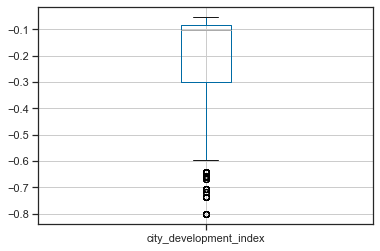

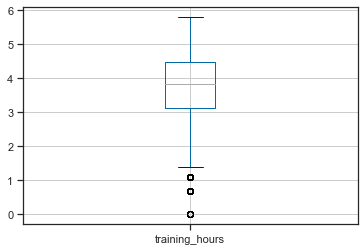

In [34]:
for i in num_normalise:  
         df.boxplot(column=i)
         plt.show()       

In [35]:
for i in num_normalise:
  IQR=df[i].quantile(0.75)-df[i].quantile(0.25)
  lower_bridge=df[i].quantile(0.25)-(IQR*1.5)
  upper_bridge=df[i].quantile(0.75)+(IQR*1.5)
  print(lower_bridge), print(upper_bridge)
  df.loc[df[i]>upper_bridge,[i]]=upper_bridge
  df.loc[df[i]<lower_bridge,[i]]=lower_bridge

-0.6276903185512275
0.24320361682825492
1.122730318105564
6.490100712301793


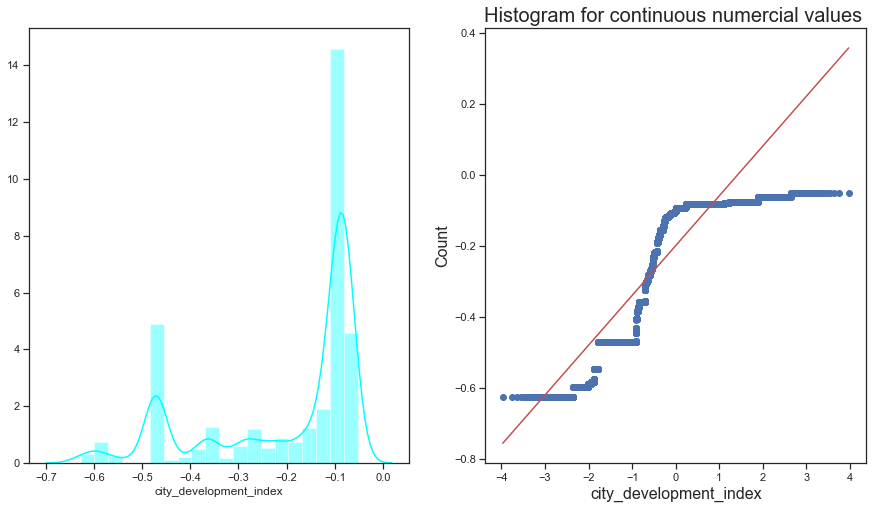

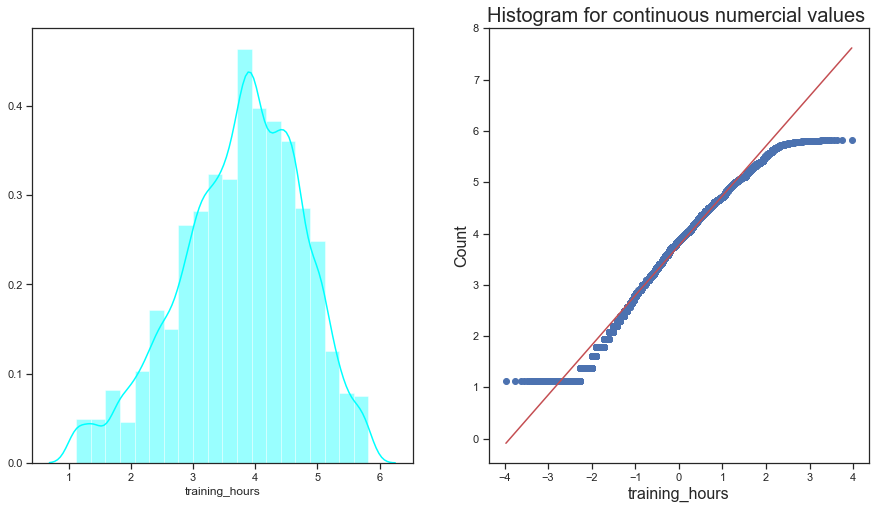

In [36]:
for i in num_normalise:
    plt.figure(figsize = (15, 8))
    plt.style.use('tableau-colorblind10')
    plt.subplot(1,2,1)
    sns.distplot(df[i],kde=True, bins =20, color = 'cyan')
    plt.subplot(1,2,2)
    stat.probplot(df[i],dist='norm',plot=pylab)
    plt.xlabel(i, fontsize = 16)
    plt.ylabel('Count',fontsize = 16)
    plt.title(label = 'Histogram for continuous numercial values ', fontsize = 20)
    plt.show()

#### 2.4 one hot encoding

In [37]:
cat=[x for x in df.columns if df[x].dtypes=='O' and x not in "city"]
cat

['gender',
 'relevent_experience',
 'enrolled_university',
 'education_level',
 'major_discipline',
 'experience',
 'company_size',
 'company_type',
 'last_new_job']

In [38]:
for i in cat:             
    print("The feature is {} and the unique variables is {}".format(i,df[i].unique()))

The feature is gender and the unique variables is ['Male' 'Female' 'Other']
The feature is relevent_experience and the unique variables is ['Has relevent experience' 'No relevent experience']
The feature is enrolled_university and the unique variables is ['no_enrollment' 'Full time course' 'Part time course']
The feature is education_level and the unique variables is ['Graduate' 'Masters' 'High School' 'Phd' 'Primary School']
The feature is major_discipline and the unique variables is ['STEM' 'Business Degree' 'NUll values' 'Arts' 'Humanities' 'No Major'
 'Other']
The feature is experience and the unique variables is ['>20' '15' '5' '<1' '11' '13' '7' '17' '2' '16' '1' '4' '10' '14' '18'
 '19' '12' '3' '6' '9' '8' '20']
The feature is company_size and the unique variables is ['50-99' '100-500' '<10' '10000+' '5000-9999' '1000-4999' '10/49'
 '500-999']
The feature is company_type and the unique variables is ['NUll values' 'Pvt Ltd' 'Funded Startup' 'Early Stage Startup' 'Other'
 'Public

In [39]:
df["gender"]=df["gender"].map({"Male":1,"Female":2,"Other":3})
df["relevent_experience"]=df["relevent_experience"].map({"Has relevent experience":1,"No relevent experience":0})
df["enrolled_university"]=df["enrolled_university"].map({'no_enrollment':0,'Part time course':1,'Full time course':2})
df["education_level"]=df["education_level"].map({"Primary School":1,"High School":2,"Graduate":3,"Masters":4,"Phd":5})

In [40]:
#### label encoding and one hot encoding

In [41]:
from sklearn.preprocessing import LabelEncoder
encoding=LabelEncoder()
for x in cat:
    if x in [x for x in ["major_discipline","company_type"]]:
        print(x)
        df[x]=encoding.fit_transform(df[x])
    else:
        df2=pd.get_dummies(df,drop_first=False,columns=["experience",'last_new_job',"company_size"])
       

major_discipline
company_type


In [42]:
df=df2.copy()

In [43]:
df.drop(columns=["city","enrollee_id"],inplace=True)

In [44]:
df.head()

,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,company_type,training_hours,target,experience_1,experience_10,experience_11,experience_12,experience_13,experience_14,experience_15,experience_16,experience_17,experience_18,experience_19,experience_2,experience_20,experience_3,experience_4,experience_5,experience_6,experience_7,experience_8,experience_9,experience_<1,experience_>20,last_new_job_1,last_new_job_2,last_new_job_3,last_new_job_4,last_new_job_>4,last_new_job_never,company_size_10/49,company_size_100-500,company_size_1000-4999,company_size_10000+,company_size_50-99,company_size_500-999,company_size_5000-9999,company_size_<10
0,-0.083382,1,1,0,3,6,3,3.583519,1.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0
1,-0.253603,1,0,0,3,6,6,3.850148,0.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0
2,-0.471605,1,0,2,3,6,3,4.418841,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0
3,-0.236989,1,0,0,3,1,6,3.951244,1.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0
4,-0.265268,1,1,0,4,6,1,2.079442,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0


In [45]:
for i in df.columns:
    if i in [x for x in ["city_development_index","target"]]:
          pass
    else:
        df[i]=df[i].astype("int")

In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19158 entries, 0 to 19157
Data columns (total 45 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   city_development_index  19158 non-null  float64
 1   gender                  19158 non-null  int32  
 2   relevent_experience     19158 non-null  int32  
 3   enrolled_university     19158 non-null  int32  
 4   education_level         19158 non-null  int32  
 5   major_discipline        19158 non-null  int32  
 6   company_type            19158 non-null  int32  
 7   training_hours          19158 non-null  int32  
 8   target                  19158 non-null  float64
 9   experience_1            19158 non-null  int32  
 10  experience_10           19158 non-null  int32  
 11  experience_11           19158 non-null  int32  
 12  experience_12           19158 non-null  int32  
 13  experience_13           19158 non-null  int32  
 14  experience_14           19158 non-null

#### 2.5 balancing our target column

In [47]:
x=df.drop(columns=["target"],axis=1)
y=df.loc[0:,["target"]]

In [48]:
from imblearn.combine import SMOTETomek
from imblearn.under_sampling import NearMiss

In [49]:
# Implementing Oversampling for Handling Imbalanced 
smk = SMOTETomek(random_state=42)
X_res,y_res=smk.fit_sample(x,y)

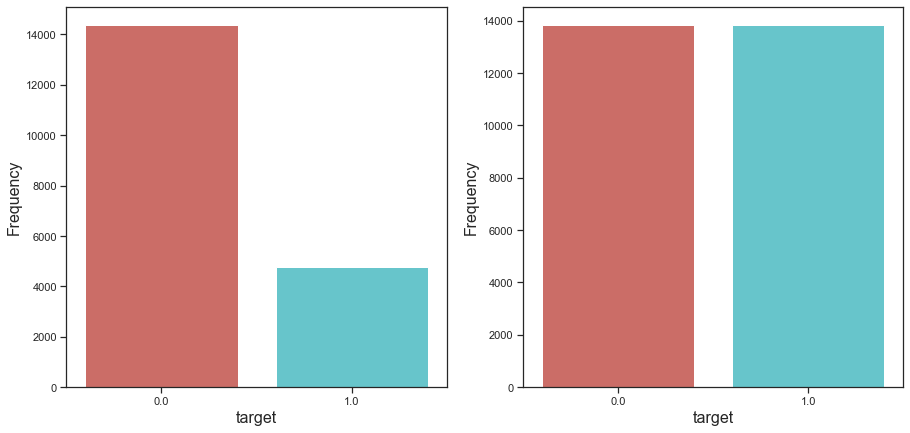

In [50]:
sns.set(style="ticks")
for i in y:
  plt.figure(figsize = (15, 7))
  plt.subplot(1,2,1)
  sns.countplot(x =i, data =y, palette = 'hls')
  plt.xlabel(i, fontsize = 16)
  plt.ylabel('Frequency', fontsize = 16)
for i in y_res:
  plt.subplot(1,2,2)
  sns.countplot(x =i, data =y_res, palette = 'hls')
  plt.xlabel(i, fontsize = 16)
  plt.ylabel('Frequency', fontsize = 16)
  plt.show()

#### 2.6 multicollinearity check

In [51]:
print(X_res.shape),print(y_res.shape)

(27684, 44)
(27684, 1)


(None, None)

In [52]:
from sklearn.preprocessing import StandardScaler
scaler =StandardScaler()
X_scaled = scaler.fit_transform(X_res)

In [53]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
variables =X_scaled
vif = pd.DataFrame()
vif["VIF"] = [variance_inflation_factor(variables, i) for i in range(variables.shape[1])]
vif["Features"] = X_res.columns

In [54]:
vif

,VIF,Features
0,1.284705,city_development_index
1,1.015228,gender
2,1.517457,relevent_experience
3,1.288419,enrolled_university
4,1.332292,education_level
5,1.286929,major_discipline
6,1.239388,company_type
7,1.005861,training_hours
8,1.262005,experience_1
9,1.324023,experience_10


#### There is not much multicollinearity  while we are performing PCA multicollinearity will be reduced

#### 2.7 Feature selection

In [55]:
from sklearn.ensemble import ExtraTreesClassifier
model=ExtraTreesClassifier()
model.fit(X_res,y_res)

ExtraTreesClassifier()

In [56]:
print(model.feature_importances_)

[0.25720863 0.01653337 0.02935519 0.03516848 0.04882295 0.04228769
 0.08984184 0.09278995 0.00663652 0.01040733 0.00811757 0.00716092
 0.00601316 0.00779368 0.0084905  0.00807821 0.00577494 0.00503409
 0.0050377  0.01077388 0.00250609 0.01297784 0.01297546 0.01327138
 0.012949   0.0118381  0.01020654 0.01102927 0.00669975 0.01923188
 0.02155792 0.01566581 0.00993564 0.00945543 0.01212954 0.01637555
 0.01196664 0.01887903 0.01052485 0.01305308 0.01847224 0.00904382
 0.00657513 0.0113534 ]


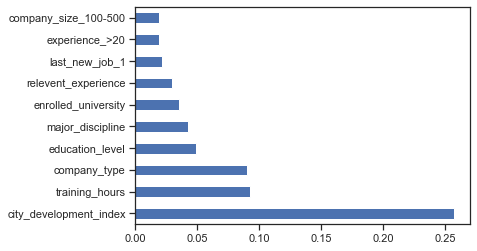

In [57]:
ranked_features=pd.Series(model.feature_importances_,index=X_res.columns)
ranked_features.nlargest(10).plot(kind='barh')
plt.show()


##### Top ten most important feature in our dataset

#### 2.8 PCA

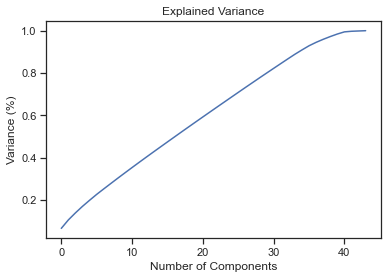

In [58]:
from sklearn.decomposition import PCA
pca = PCA()
principalComponents = pca.fit_transform(X_scaled)
plt.figure()
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Variance (%)') #for each component
plt.title('Explained Variance')
plt.show()

In [59]:
col=[]
for i in range(1,36):
  i=str(i)
  col.append("PCA_"+i)
pca = PCA(n_components=35)
new_data = pca.fit_transform(X_scaled)
  # This will be the new data fed to the algorithm.
principal_Df = pd.DataFrame(data = new_data
             , columns =col)

In [60]:
principal_Df 

,PCA_1,PCA_2,PCA_3,PCA_4,PCA_5,PCA_6,PCA_7,PCA_8,PCA_9,PCA_10,PCA_11,PCA_12,PCA_13,PCA_14,PCA_15,PCA_16,PCA_17,PCA_18,PCA_19,PCA_20,PCA_21,PCA_22,PCA_23,PCA_24,PCA_25,PCA_26,PCA_27,PCA_28,PCA_29,PCA_30,PCA_31,PCA_32,PCA_33,PCA_34,PCA_35
0,-0.660073,0.558314,-2.465890,0.901115,0.328849,-0.676243,0.181168,-0.664332,-0.052127,-0.438330,0.265501,-0.234293,-0.024040,-0.157979,-0.194535,-0.070334,-0.069846,-0.051466,-0.208884,-0.297132,-0.498959,-0.043583,0.004895,-0.330921,0.144974,-0.097633,0.010007,-0.094728,0.150128,-0.160146,-0.085668,0.143869,0.046050,-0.240975,-0.953345
1,-0.784970,1.894411,-0.689699,-0.691140,-1.081526,-0.457359,0.147673,1.136611,1.461688,0.607875,-1.124765,0.821262,0.165106,1.344176,-0.730097,-1.768721,0.526694,-0.543021,-1.252509,0.391996,0.791283,0.013383,-1.689348,0.337051,-2.378848,1.935367,-0.458183,0.685225,-0.127003,-1.440999,0.123540,-1.311711,-2.305055,-1.089496,1.071286
2,2.725673,0.149258,2.400701,-0.018109,-0.225262,-1.763558,-0.200182,0.990274,0.068385,-0.908257,-0.155520,-1.609122,3.130581,-0.167274,0.085462,0.092107,0.620553,0.101794,-0.341362,0.865293,-0.016244,0.322081,-0.028912,0.145880,-0.007863,-0.139332,0.204766,-0.020700,-0.155551,0.327626,0.348223,0.018965,-0.044612,0.711679,0.922795
3,2.780088,2.492097,0.103870,-1.091565,-1.410432,0.696349,-1.109066,0.231574,-0.303268,-0.251637,-0.490643,0.166348,-0.556904,0.514151,1.683275,-2.196664,-0.663173,3.636441,1.251877,0.292671,0.514223,-0.741815,0.530298,-0.428640,-0.251568,-0.827958,-0.571859,-0.113082,-0.055583,-1.583369,-0.226839,-0.053271,0.343168,-0.304763,-1.194489
4,-1.293984,1.220876,-1.770942,-0.566469,1.167433,-1.489009,0.696096,1.739623,-1.930529,-1.463589,0.488733,-0.986243,-1.003593,-0.509151,0.406826,0.333544,0.354716,0.439390,-0.758333,-0.177032,-0.237723,0.391758,-0.097449,-0.360238,0.833884,0.259498,0.387107,0.036230,-0.033505,0.623840,1.157619,1.406678,-1.639032,-1.456674,-2.184036
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27679,-1.370977,-0.510967,0.892196,-1.707068,0.024736,0.411228,-0.022682,2.322418,2.294550,-0.762381,-0.527551,0.666500,-0.355955,1.220938,0.034096,-0.534821,-0.437495,-1.006123,-1.088526,-0.077828,0.995333,3.981091,0.607706,-1.651737,3.924611,-1.966493,-3.352894,0.617934,1.080391,-0.649401,-0.057665,-2.213069,2.646669,-0.462197,-0.745729
27680,0.337383,1.322174,-0.277139,-1.446530,-0.209293,-0.110270,-0.065755,0.300764,0.049824,-0.189192,0.063271,-0.117832,0.182777,-0.036988,-0.110920,0.262567,0.069581,0.070798,0.251136,-0.025439,-0.057270,0.047035,-0.281466,-0.003380,-0.068369,0.076659,0.224259,0.134862,0.120704,0.093009,0.301655,-0.510471,0.039331,0.536242,0.099137
27681,-1.708388,0.948065,0.311518,1.861441,1.110571,-1.383222,0.390298,0.005364,0.107835,-0.740234,-0.027163,-0.632309,0.169695,-0.218593,-0.285027,0.286808,0.075440,0.255136,0.239996,0.040352,-0.368419,0.405931,-0.085118,-0.672256,-0.291059,-0.221782,0.086281,-0.133247,-0.144525,0.203277,0.299509,-0.470925,-0.237941,1.613952,-1.049094
27682,-1.555269,-0.826992,0.442310,-0.811552,-1.198481,0.233420,1.308242,0.395818,0.091708,1.746201,-1.211522,-0.436406,0.764721,-0.395936,-0.610578,0.373585,0.821807,1.188269,0.490646,0.226046,-0.411035,-0.463077,0.040537,-0.328913,-0.047944,-0.335440,-0.014944,-0.839369,-0.277812,0.802001,1.324405,-1.561174,0.238950,0.871346,-0.849217


### finding average training and test accuracy using RandomForestRegressor

In [61]:
from sklearn.model_selection import KFold

In [62]:
kfold = KFold(n_splits=15,random_state= 42)
kfold.get_n_splits(principal_Df)

15

In [63]:
from sklearn.ensemble import RandomForestClassifier

In [64]:
from sklearn.model_selection import KFold
from statistics import mean
Classifier = RandomForestClassifier(n_estimators =100, random_state = 0)
cnt =0
count=[]
train_score =[]
test_score = []

for train_index,test_index in kfold.split(principal_Df):
    X_train, X_test =principal_Df.iloc[train_index],principal_Df.iloc[test_index] # our scaled data is an array so it can work on x[value]
    y_train, y_test = y_res.iloc[train_index,0], y_res.iloc[test_index,0] # y is a dataframe so we have to use "iloc" to retreive data
    Classifier.fit(X_train,y_train)
    train_score_ = Classifier.score(X_train,y_train)
    test_score_ =Classifier.score(X_test,y_test)
    cnt+=1
    count.append(cnt)
    train_score.append(train_score_)
    test_score.append(test_score_)
    
    print("for k = ", cnt)
    print("train_score is :  ", train_score_, "and test score is :  ", test_score_)
print("************************************************")
print("************************************************")
print("Average train score is :  ", mean(train_score))
print("Average test score is :  ", mean(test_score))

for k =  1
train_score is :   0.9825063859431844 and test score is :   0.7843986998916577
for k =  2
train_score is :   0.9826611966870501 and test score is :   0.7876489707475623
for k =  3
train_score is :   0.9825063859431844 and test score is :   0.7806067172264355
for k =  4
train_score is :   0.9829708181747814 and test score is :   0.7789815817984832
for k =  5
train_score is :   0.9828934128028485 and test score is :   0.7654387865655471
for k =  6
train_score is :   0.9820032510256211 and test score is :   0.8001083423618635
for k =  7
train_score is :   0.9825450886291509 and test score is :   0.7708559046587216
for k =  8
train_score is :   0.9825837913151173 and test score is :   0.7838569880823402
for k =  9
train_score is :   0.9824289805712516 and test score is :   0.7773564463705309
for k =  10
train_score is :   0.9819265451449359 and test score is :   0.8113821138211382
for k =  11
train_score is :   0.9800688881148651 and test score is :   0.9262872628726287
for k = 

### model 1:logestic regression

In [65]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score
import sklearn

In [66]:
x_train,x_test,y_train,y_test=train_test_split(X_res,y_res,test_size=0.25,random_state=100)

In [67]:
log_reg = LogisticRegression()
log_reg.fit(x_train,y_train)

LogisticRegression()

In [68]:
y_pred = log_reg.predict(x_test)
accuracy = accuracy_score(y_test,y_pred)

In [69]:
accuracy                             ##accuracy

0.7842797283629533

In [70]:
conf_mat = confusion_matrix(y_test,y_pred)                 ##confusion_matrix
conf_mat 

array([[2940,  587],
       [ 906, 2488]], dtype=int64)

In [71]:
true_positive = conf_mat[0][0]
false_positive = conf_mat[0][1]
false_negative = conf_mat[1][0]
true_negative = conf_mat[1][1]

In [72]:
# Breaking down the formula for Accuracy
Accuracy = (true_positive + true_negative) / (true_positive +false_positive + false_negative + true_negative)
Accuracy

0.7842797283629533

In [73]:
# Precison
Precision = true_positive/(true_positive+false_positive)
Precision

0.8335696058973632

In [74]:
# Recall
Recall = true_positive/(true_positive+false_negative)
Recall

0.7644305772230889

In [75]:
# F1 Score
F1_Score = 2*(Recall * Precision) / (Recall + Precision)
F1_Score

0.7975044079750441

In [76]:
sklearn.metrics.log_loss(y_test, y_pred)     ### log loss for logestic regression

7.45078204324421

In [77]:
target_names = ['class 0', 'class 1']

In [78]:
print(sklearn.metrics.classification_report(y_test,y_pred,target_names=target_names))

              precision    recall  f1-score   support

     class 0       0.76      0.83      0.80      3527
     class 1       0.81      0.73      0.77      3394

    accuracy                           0.78      6921
   macro avg       0.79      0.78      0.78      6921
weighted avg       0.79      0.78      0.78      6921



#### In  our problem statement we should focus on precision because we have to reduce the false positive rate(actualy he is not selected but model have predicted he is selected which is wrong and it is waste of time  for him he may search job in some other company) .Precision=0.8456029790890862 which is prety much good

#### AUC ROC CURVE

In [79]:
auc=roc_auc_score(y_test,y_pred)

In [80]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred)

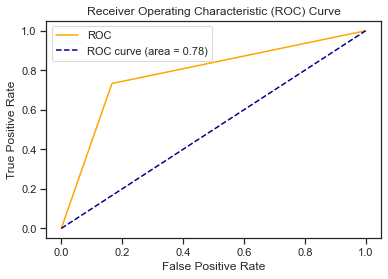

In [81]:
plt.plot(fpr, tpr, color='orange', label='ROC')
plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--',label='ROC curve (area = %0.2f)' % auc)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()

##### ACU ROC is pretty much good we have got 0.78 percent of area our model classifies well between true postive and false fastive

### model-2: decision tree

In [82]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import RandomizedSearchCV

In [83]:
#let's first visualize the tree on the data without doing any pre processing
clf=DecisionTreeClassifier()
clf.fit(x_train,y_train)

DecisionTreeClassifier()

In [84]:
y_pred1 = clf.predict(x_test)
accuracy = accuracy_score(y_test,y_pred1)

In [85]:
accuracy

0.7802340702210663

#### hyper parameter tuning to increase accuracy

In [86]:
clf1=DecisionTreeClassifier()
clf1.fit(x_train,y_train)

DecisionTreeClassifier()

In [87]:
# we are tuning three hyperparameters right now, we are passing the different values for both parameters
grid_param = {
    'criterion': ['gini', 'entropy'],
    'max_depth' : range(2,32,1),
    'min_samples_leaf' : range(1,10,1),
    'min_samples_split': range(2,10,1),
    'splitter' : ['best', 'random']
    
}

In [88]:
hyper=RandomizedSearchCV(clf1,param_distributions=grid_param,cv=10,n_jobs =-1)
hyper.fit(x_train,y_train)

RandomizedSearchCV(cv=10, estimator=DecisionTreeClassifier(), n_jobs=-1,
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': range(2, 32),
                                        'min_samples_leaf': range(1, 10),
                                        'min_samples_split': range(2, 10),
                                        'splitter': ['best', 'random']})

In [89]:
hyper.best_params_

{'splitter': 'best',
 'min_samples_split': 3,
 'min_samples_leaf': 4,
 'max_depth': 19,
 'criterion': 'entropy'}

In [90]:
final=DecisionTreeClassifier(splitter="best",min_samples_split=7,min_samples_leaf=5,max_depth=18,criterion='gini')
final.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=18, min_samples_leaf=5, min_samples_split=7)

In [91]:
y_pred =final.predict(x_test)
accuracy = accuracy_score(y_test,y_pred)

In [92]:
accuracy                    ##accuracy

0.7900592399942205

In [93]:
conf_mat = confusion_matrix(y_test,y_pred)                 ##confusion_matrix
conf_mat 

array([[2730,  797],
       [ 656, 2738]], dtype=int64)

In [94]:
true_positive = conf_mat[0][0]
false_positive = conf_mat[0][1]
false_negative = conf_mat[1][0]
true_negative = conf_mat[1][1]

In [95]:
# Breaking down the formula for Accuracy
Accuracy = (true_positive + true_negative) / (true_positive +false_positive + false_negative + true_negative)
Accuracy

0.7900592399942205

In [96]:
# Precison
Precision = true_positive/(true_positive+false_positive)
Precision

0.7740289197618373

In [97]:
# Recall
Recall = true_positive/(true_positive+false_negative)
Recall

0.8062610750147667

In [98]:
# F1 Score
F1_Score = 2*(Recall * Precision) / (Recall + Precision)
F1_Score

0.7898162881527557

In [99]:
sklearn.metrics.log_loss(y_test, y_pred)     ### log loss 

7.251189045073991

In [100]:
target_names = ['class 0', 'class 1']

In [101]:
print(sklearn.metrics.classification_report(y_test,y_pred,target_names=target_names))

              precision    recall  f1-score   support

     class 0       0.81      0.77      0.79      3527
     class 1       0.77      0.81      0.79      3394

    accuracy                           0.79      6921
   macro avg       0.79      0.79      0.79      6921
weighted avg       0.79      0.79      0.79      6921



##### AUC ROC CURVE¶

In [102]:
fpr1, tpr1, thresholds1 = roc_curve(y_test, y_pred)

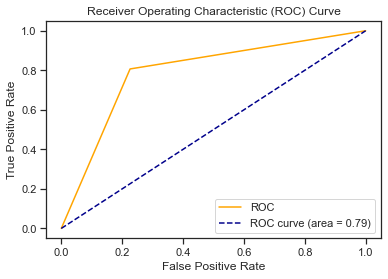

In [103]:
auc1=roc_auc_score(y_test,y_pred)
plt.plot(fpr1, tpr1, color='orange', label='ROC')
plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--',label='ROC curve (area = %0.2f)' % auc1)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()

##### ACU ROC is pretty much good we have got 0.79 percent of area our model classifies well between true postive and false fastive

### Model-3: XG boost

In [104]:
from xgboost import XGBClassifier

In [105]:
x_train.columns=[x for x in range(1,45)]
x_test.columns=[x for x in range(1,45)]

In [106]:
model = XGBClassifier(objective='binary:logistic')
model.fit(x_train,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=0, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [107]:
y_pred = model.predict(x_test)
accuracy = accuracy_score(y_test,y_pred)
accuracy

0.8374512353706112

#### hyper parameter tuning to increase accuracy

In [108]:
params= {
             'learning_rate':[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9],
             'n_estimators':[x for x in range(1,300)],
             'max_depth':[x for x in range(1,100)],
             'min_child_weight':[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9],
             'gamma':[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9],
             'seed':[x for x in range(1,50)] }

In [109]:
from sklearn.model_selection import RandomizedSearchCV
parameter=RandomizedSearchCV
xgb1= XGBClassifier(objective='binary:logistic')
random=parameter(xgb1,param_distributions=params,cv=8,n_jobs=-1)
random.fit(x_train,y_train)


RandomizedSearchCV(cv=8,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None, gamma=None,
                                           gpu_id=None, importance_type='gain',
                                           interaction_constraints=None,
                                           learning_rate=None,
                                           max_delta_step=None, max_depth=None,
                                           min_child_weight=None, missing=nan,
                                           monotone_constraints=None,
                                           n_estimators=100,...
                                        'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9,
                                                      10, 11, 12, 13, 14, 15,
                      

In [110]:
print(random.best_params_)
print(random.best_score_)

{'seed': 36, 'n_estimators': 257, 'min_child_weight': 0.3, 'max_depth': 11, 'learning_rate': 0.3, 'gamma': 0.7}
0.8590764174021988


In [111]:
model2 = XGBClassifier(objective='binary:logistic',seed=28,n_estimators=123,min_child_weight=0.9,max_depth=22,learning_rate=0.4,gamma=0.7)
model2.fit(x_train,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0.7, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.4, max_delta_step=0, max_depth=22,
              min_child_weight=0.9, missing=nan, monotone_constraints='()',
              n_estimators=123, n_jobs=0, num_parallel_tree=1, random_state=28,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=28,
              subsample=1, tree_method='exact', validate_parameters=1,
              verbosity=None)

In [112]:
y_pred =model2.predict(x_test)
accuracy = accuracy_score(y_test,y_pred)
accuracy

0.8484323074700187

In [113]:
conf_mat = confusion_matrix(y_test,y_pred)                 ##confusion_matrix
conf_mat 

array([[2993,  534],
       [ 515, 2879]], dtype=int64)

In [114]:
true_positive = conf_mat[0][0]
false_positive = conf_mat[0][1]
false_negative = conf_mat[1][0]
true_negative = conf_mat[1][1]

In [115]:
# Breaking down the formula for Accuracy
Accuracy = (true_positive + true_negative) / (true_positive +false_positive + false_negative + true_negative)
Accuracy

0.8484323074700187

In [116]:
# Precison
Precision = true_positive/(true_positive+false_positive)
Precision

0.8485965409696626

In [117]:
# Recall
Recall = true_positive/(true_positive+false_negative)
Recall

0.8531927023945268

In [118]:
# F1 Score
F1_Score = 2*(Recall * Precision) / (Recall + Precision)
F1_Score

0.8508884150675197

In [119]:
sklearn.metrics.log_loss(y_test, y_pred)     ### log loss 

5.23502433510895

In [120]:
target_names = ['class 0', 'class 1']
print(sklearn.metrics.classification_report(y_test,y_pred,target_names=target_names))

              precision    recall  f1-score   support

     class 0       0.85      0.85      0.85      3527
     class 1       0.84      0.85      0.85      3394

    accuracy                           0.85      6921
   macro avg       0.85      0.85      0.85      6921
weighted avg       0.85      0.85      0.85      6921



#### AUC ROC CURVE

In [121]:
fpr2, tpr2,thresholds2 = roc_curve(y_test, y_pred)

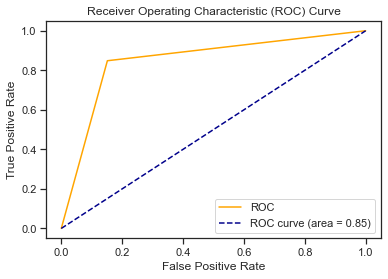

In [122]:
auc2=roc_auc_score(y_test,y_pred)
plt.plot(fpr2, tpr2, color='orange', label='ROC')
plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--',label='ROC curve (area = %0.2f)' % auc2)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()

#### ACU ROC is pretty much good we have got 0.85 percent of area our model classifies well between true postive and false fastive

### Model-4: KNeighborsClassifier

In [123]:
from sklearn.neighbors import KNeighborsClassifier

In [124]:
# let's fit the data into kNN model and see how well it performs:
knn = KNeighborsClassifier()
knn.fit(x_train,y_train)

KNeighborsClassifier()

In [125]:
y_pred = knn.predict(x_test)
accuracy = accuracy_score(y_test,y_pred)
accuracy

0.7342869527524925

#### hyper parameter tuning to increase accuracy

In [126]:
param_grid = { 'algorithm' : ['ball_tree', 'kd_tree', 'brute'],
               'leaf_size' : [18,20,25,27,30,32,34],
               'n_neighbors' : [3,5,7,9,10,11,12,13]
              }

In [127]:
knn1 = KNeighborsClassifier()

In [128]:
from sklearn.model_selection import RandomizedSearchCV
parameter1=RandomizedSearchCV
random=parameter1(knn1,param_distributions=param_grid,cv=8,n_jobs=-1)
random.fit(x_train,y_train)


RandomizedSearchCV(cv=8, estimator=KNeighborsClassifier(), n_jobs=-1,
                   param_distributions={'algorithm': ['ball_tree', 'kd_tree',
                                                      'brute'],
                                        'leaf_size': [18, 20, 25, 27, 30, 32,
                                                      34],
                                        'n_neighbors': [3, 5, 7, 9, 10, 11, 12,
                                                        13]})

In [129]:
random.best_params_

{'n_neighbors': 3, 'leaf_size': 25, 'algorithm': 'brute'}

In [130]:
random.best_score_

0.7501810069441351

In [131]:
# we will use the best parameters in our k-NN algorithm and check if accuracy is increasing.
knn = KNeighborsClassifier(algorithm = 'brute', leaf_size =30, n_neighbors =3)

In [132]:
knn.fit(x_train,y_train)

KNeighborsClassifier(algorithm='brute', n_neighbors=3)

In [133]:
y_pred = knn.predict(x_test)
accuracy = accuracy_score(y_test,y_pred)
accuracy

0.7491691952030054

##### cross validation

In [134]:
from sklearn.model_selection import cross_val_score
accuracy_rate = []

# Will take some time
for i in range(1,40):
    
    knn = KNeighborsClassifier(n_neighbors=i)
    score=cross_val_score(knn,principal_Df,y_res,cv=10)
    accuracy_rate.append(score.mean())

Text(0, 0.5, 'accuracy_rate')

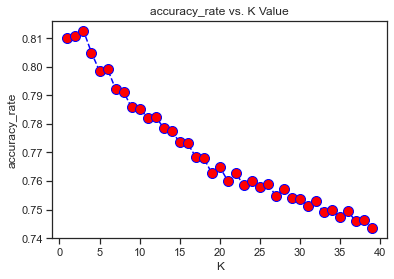

In [135]:
plt.plot(range(1,40),accuracy_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('accuracy_rate vs. K Value')
plt.xlabel('K')
plt.ylabel("accuracy_rate")

#### we xan chosse n_neighbors=6

In [136]:
conf_mat = confusion_matrix(y_test,y_pred)                 ##confusion_matrix
conf_mat 

array([[2142, 1385],
       [ 351, 3043]], dtype=int64)

In [137]:
true_positive = conf_mat[0][0]
false_positive = conf_mat[0][1]
false_negative = conf_mat[1][0]
true_negative = conf_mat[1][1]

In [138]:
# Breaking down the formula for Accuracy
Accuracy = (true_positive + true_negative) / (true_positive +false_positive + false_negative + true_negative)
Accuracy

0.7491691952030054

In [139]:
# Precison
Precision = true_positive/(true_positive+false_positive)
Precision

0.6073149985823646

In [140]:
# Recall
Recall = true_positive/(true_positive+false_negative)
Recall

0.8592057761732852

In [141]:
# F1 Score
F1_Score = 2*(Recall * Precision) / (Recall + Precision)
F1_Score

0.7116279069767442

In [142]:
sklearn.metrics.log_loss(y_test, y_pred)     ### log loss 

8.663549091750582

In [143]:
target_names = ['class 0', 'class 1']
print(sklearn.metrics.classification_report(y_test,y_pred,target_names=target_names))

              precision    recall  f1-score   support

     class 0       0.86      0.61      0.71      3527
     class 1       0.69      0.90      0.78      3394

    accuracy                           0.75      6921
   macro avg       0.77      0.75      0.74      6921
weighted avg       0.77      0.75      0.74      6921



#### AUC ROC CURVE

In [144]:
fpr3, tpr3,thresholds3 = roc_curve(y_test, y_pred)

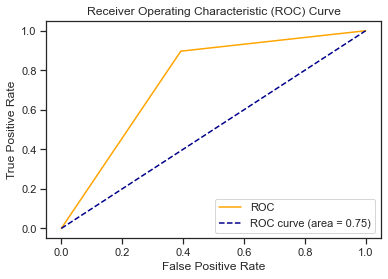

In [145]:
auc3=roc_auc_score(y_test,y_pred)
plt.plot(fpr3, tpr3, color='orange', label='ROC')
plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--',label='ROC curve (area = %0.2f)' % auc3)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()

##### ACU ROC is pretty much low we have got 0.75 percent of area our model classifies well between true postive and false fastive

### CONCLUSION

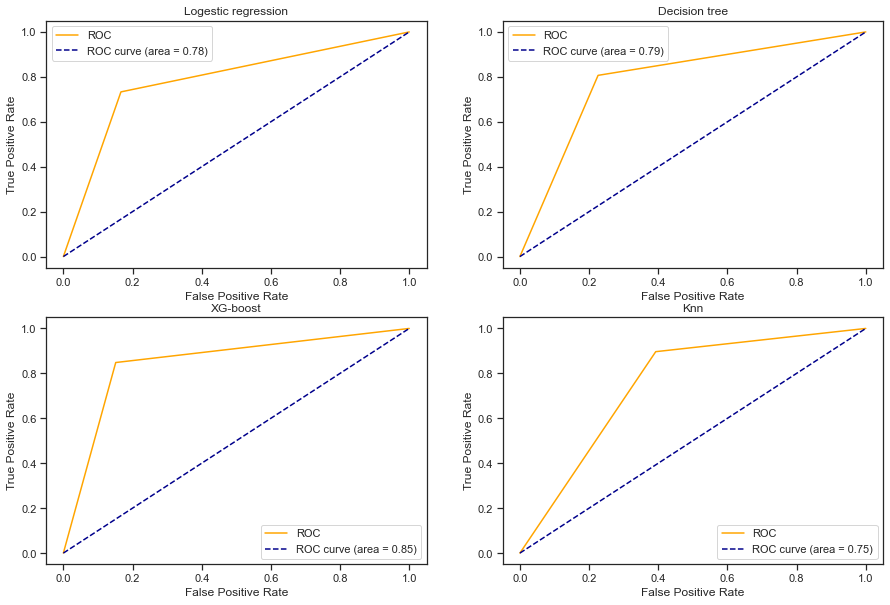

In [147]:
plt.figure(figsize = (15, 10))
plt.subplot(2,2,1)
plt.plot(fpr, tpr, color='orange', label='ROC')
plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--',label='ROC curve (area = %0.2f)' % auc)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Logestic regression')
plt.legend()
plt.subplot(2,2,2)
plt.plot(fpr1, tpr1, color='orange', label='ROC')
plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--',label='ROC curve (area = %0.2f)' % auc1)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Decision tree')
plt.legend()
plt.subplot(2,2,3)
plt.plot(fpr2, tpr2, color='orange', label='ROC')
plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--',label='ROC curve (area = %0.2f)' % auc2)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('XG-boost')
plt.legend()
plt.subplot(2,2,4)
plt.plot(fpr3, tpr3, color='orange', label='ROC')
plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--',label='ROC curve (area = %0.2f)' % auc3)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Knn')
plt.legend()
plt.show()

### BEST MODEL: X-G BOOST with 0.85 percent of AUC ROC score